# Introduction


**What?** Central limit theorem



# Centrol limit theorem vs. law of large number


- The theorem states that as the size of the sample increases, the distribution of the mean across multiple samples will approximate a Gaussian distribution. 

- ATTENTION! The central limit theorem is **NOT** the law of large numbers by beginners. 

- The law of large numbers states that as the size of a sample is increased, the more accurate of an estimate the sample mean will be of the population mean. 

- The central limit theorem does not state anything about a single sample mean; instead, it is broader and states something about the **distribution** of sample means. 

- **Why is this important?** Because the theorem is valid even if the original variables themselves are not normally distributed. The theorem is a key concept in probability theory because it implies that probabilistic and statistical methods that work for normal distributions can be applicable to many problems involving other types of distributions. 
 



# Import modules

In [1]:
from numpy.random import seed
from numpy.random import randint
from numpy import mean
from matplotlib import pyplot
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
#random.seed = 42
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
sns.set_style(style='darkgrid')

import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib as mpl
rcParams['figure.figsize'] = 15, 5
rcParams['font.size'] = 10
mpl.rcParams['figure.dpi']= 300

# Example #1


- Running the example creates a histogram plot of the sample means. 
- We can tell from the shape of the distribution that the distribution  is Gaussian.



(array([ 16.,  31., 109., 154., 239., 223., 133.,  73.,  21.,   1.]),
 array([2.82 , 2.962, 3.104, 3.246, 3.388, 3.53 , 3.672, 3.814, 3.956,
        4.098, 4.24 ]),
 <BarContainer object of 10 artists>)

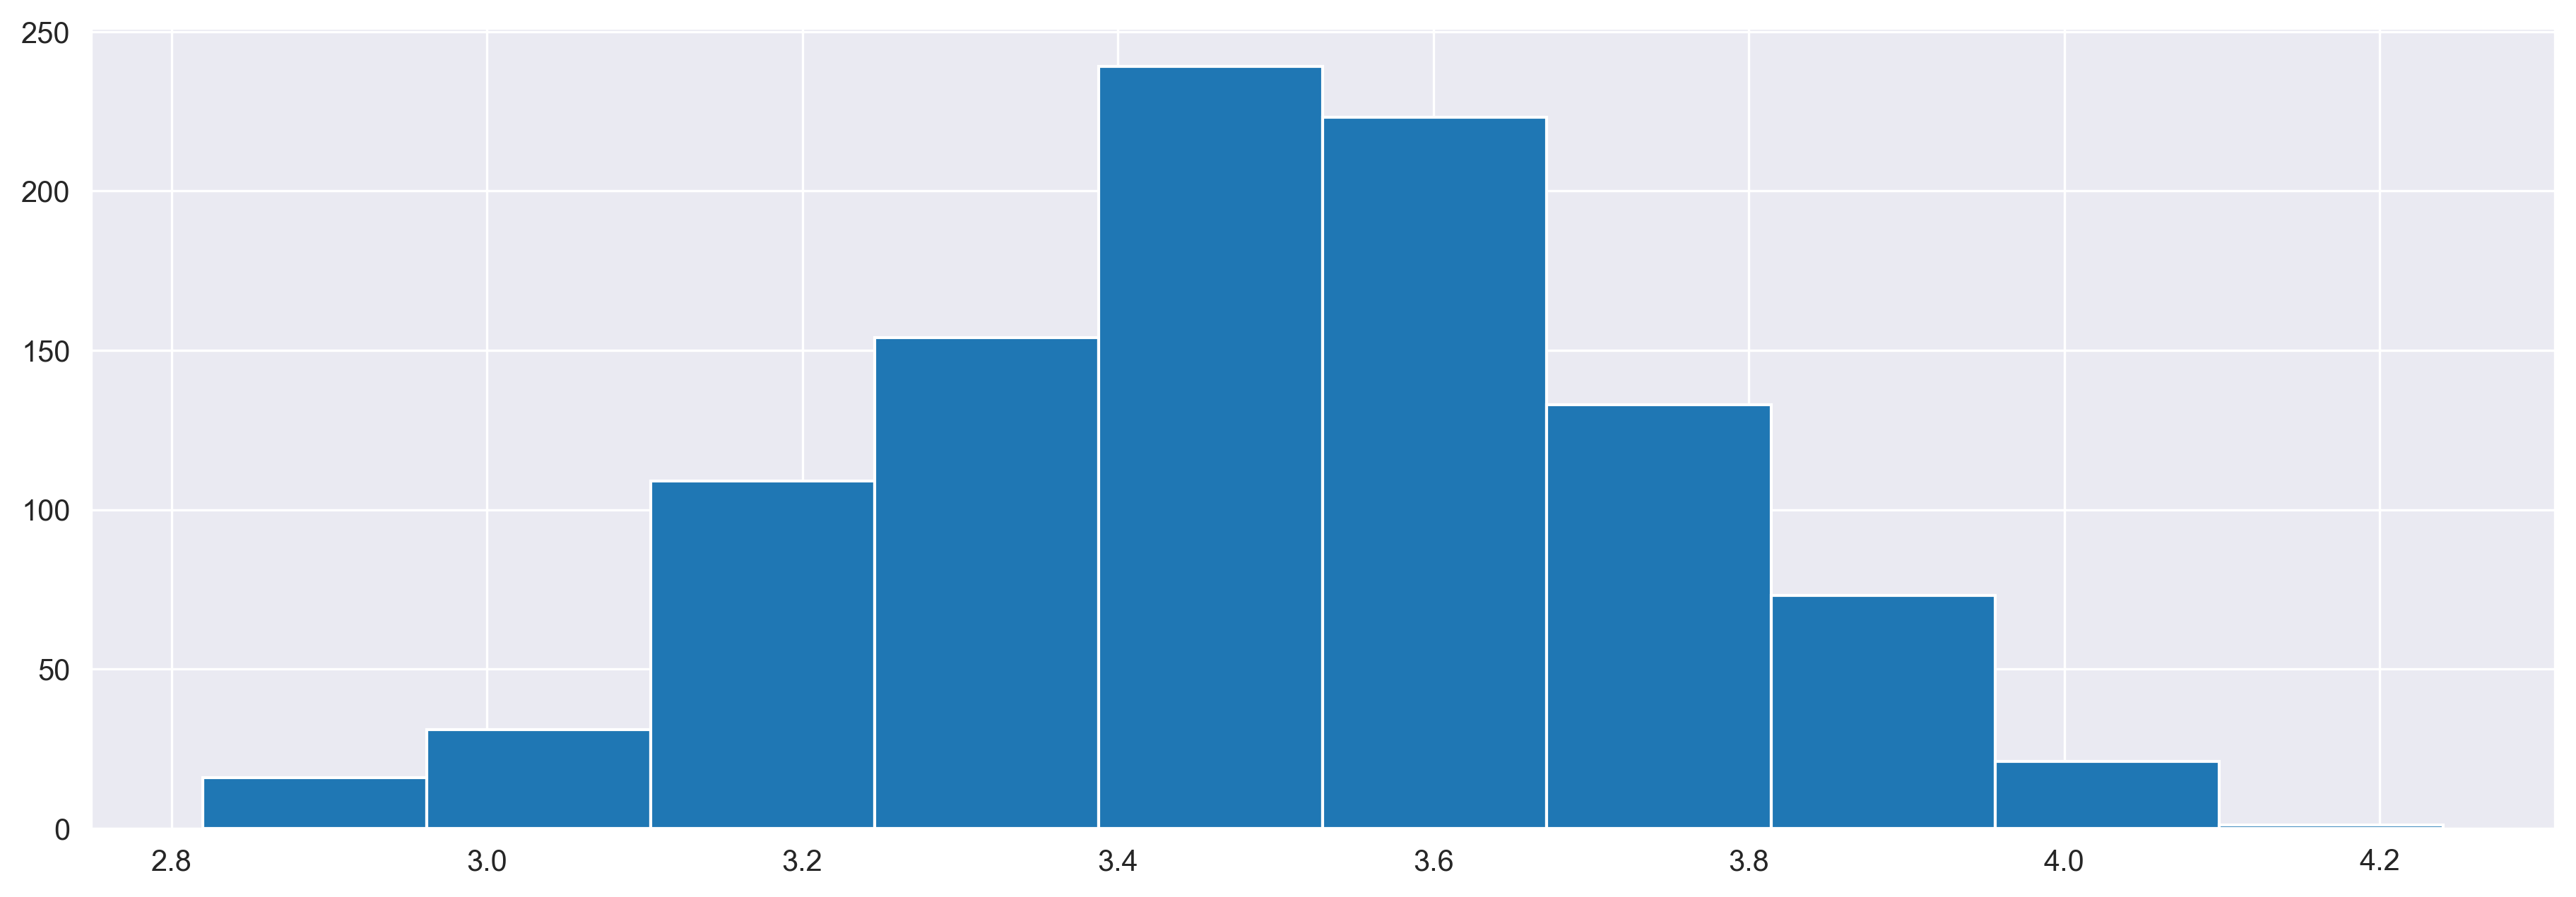

In [2]:
# seed the random number generator
seed(1)
# calculate the mean of 50 dice rolls 1000 times
means = [mean(randint(1, 7, 50)) for _ in range(1000)]
# plot the distribution of sample means
pyplot.hist(means)

# Example #2


- This second example takes in a dataset and check if the central limit theorem holds true. 



Number of datapoints in our population:  150000
Population mean is:  91252.798
Population standard deviation is:  24989.501


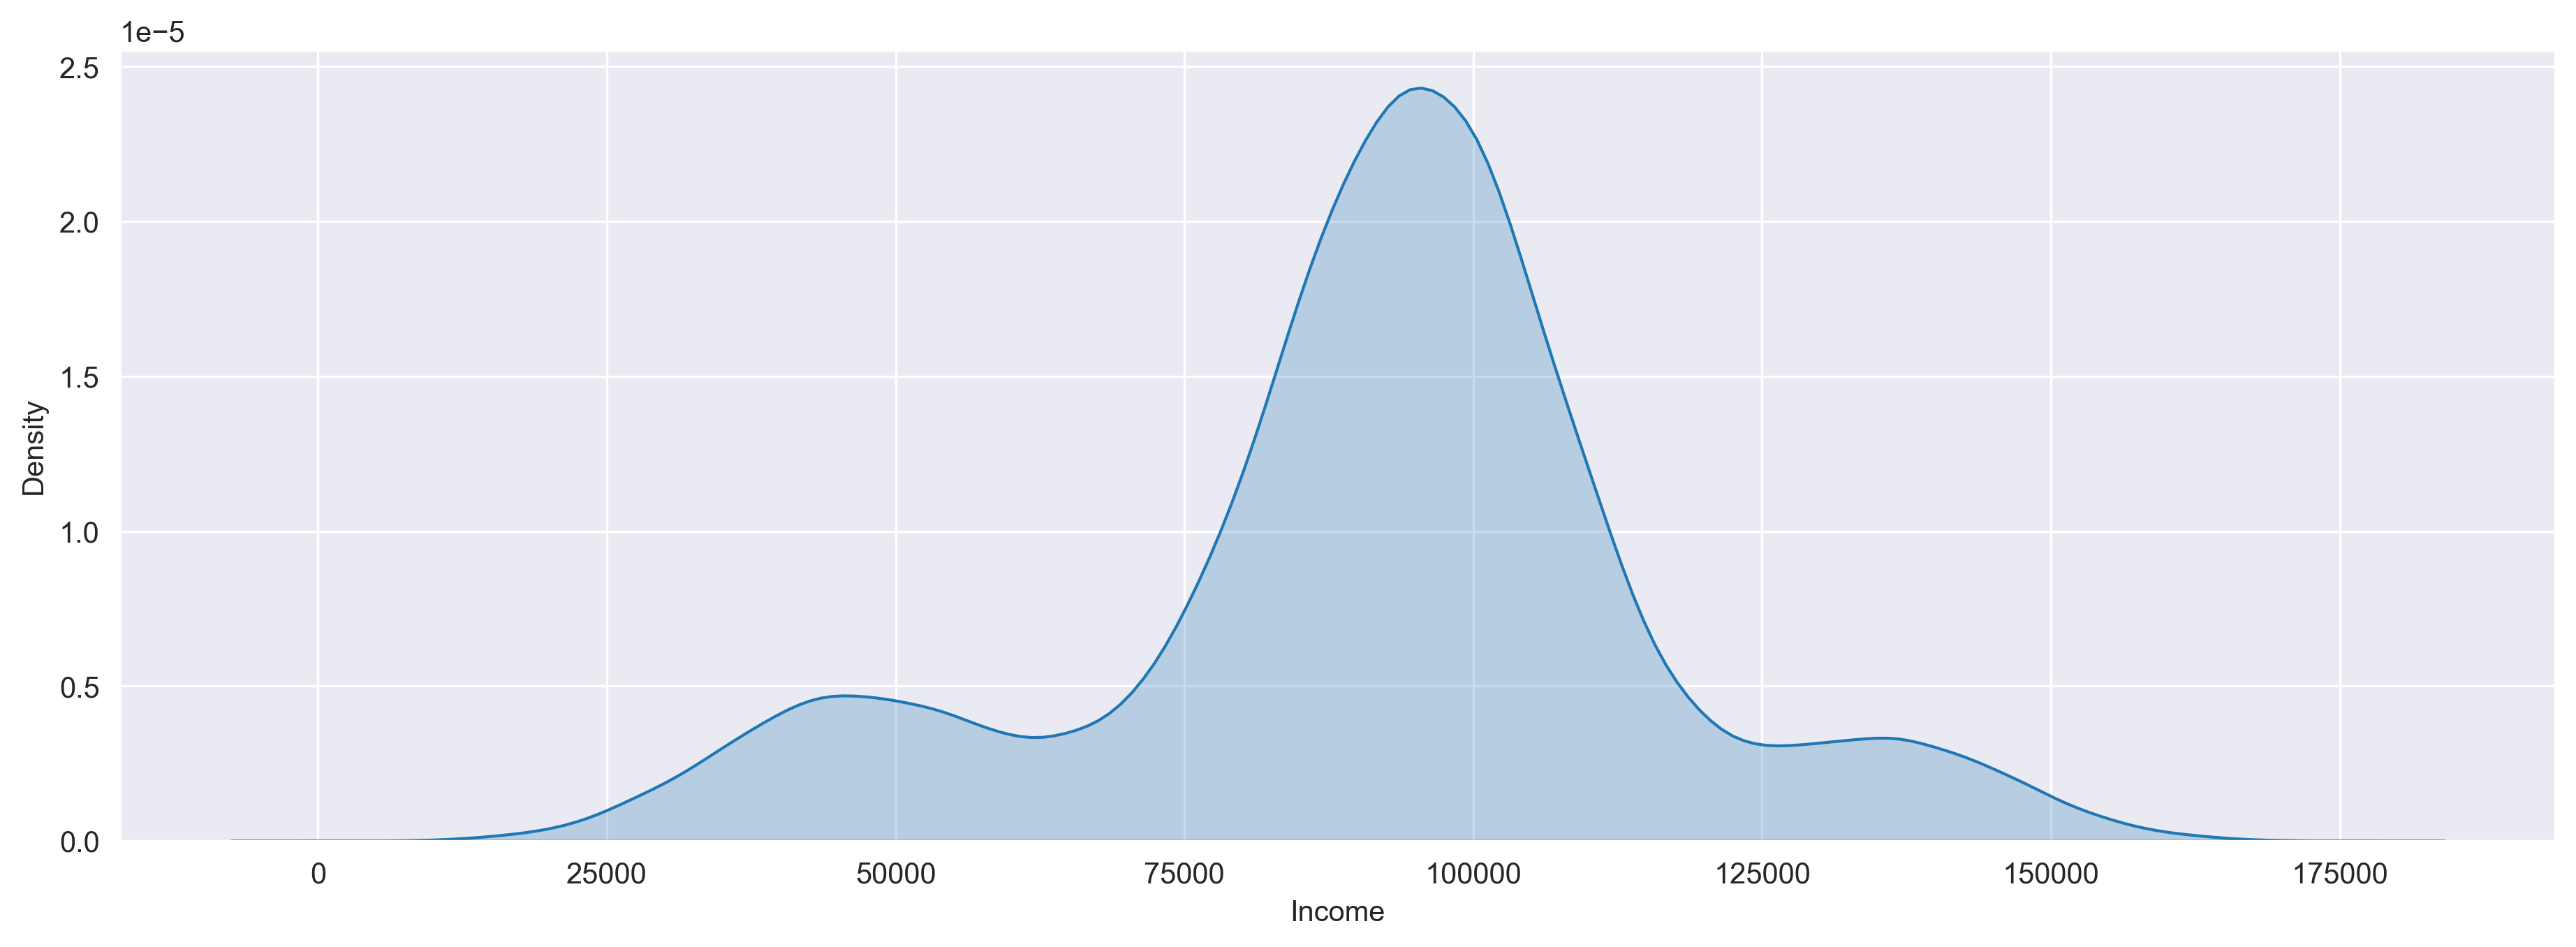

In [3]:
# reading the data and plotting the initial distribution
df = pd.read_csv(r'../DATASETS/toy_dataset.csv')
sns.kdeplot(df['Income'],shade=True)
print("Number of datapoints in our population: ",df.shape[0])
# population mean
population_mean = np.round(df['Income'].mean(),3)
# population std
population_std = np.round(df['Income'].std(),3)
print("Population mean is: ",population_mean)
print("Population standard deviation is: ",population_std)


- Now Let's take 200 samples with each of size 100, and try to plot the distribution of their 'mean'



In [4]:
def return_mean_of_samples(total_samples,element_in_each_sample):
    """
    This function takes total samples and number of elements 
    in each sample as input and generates sample means
    """
    sample_with_n_elements_m_size = []
    for i in range(total_samples):
        sample = df.sample(element_in_each_sample).mean()['Income']
        sample_with_n_elements_m_size.append(sample)
    return (sample_with_n_elements_m_size)

Total Samples:  200
Total elements in each sample:  100


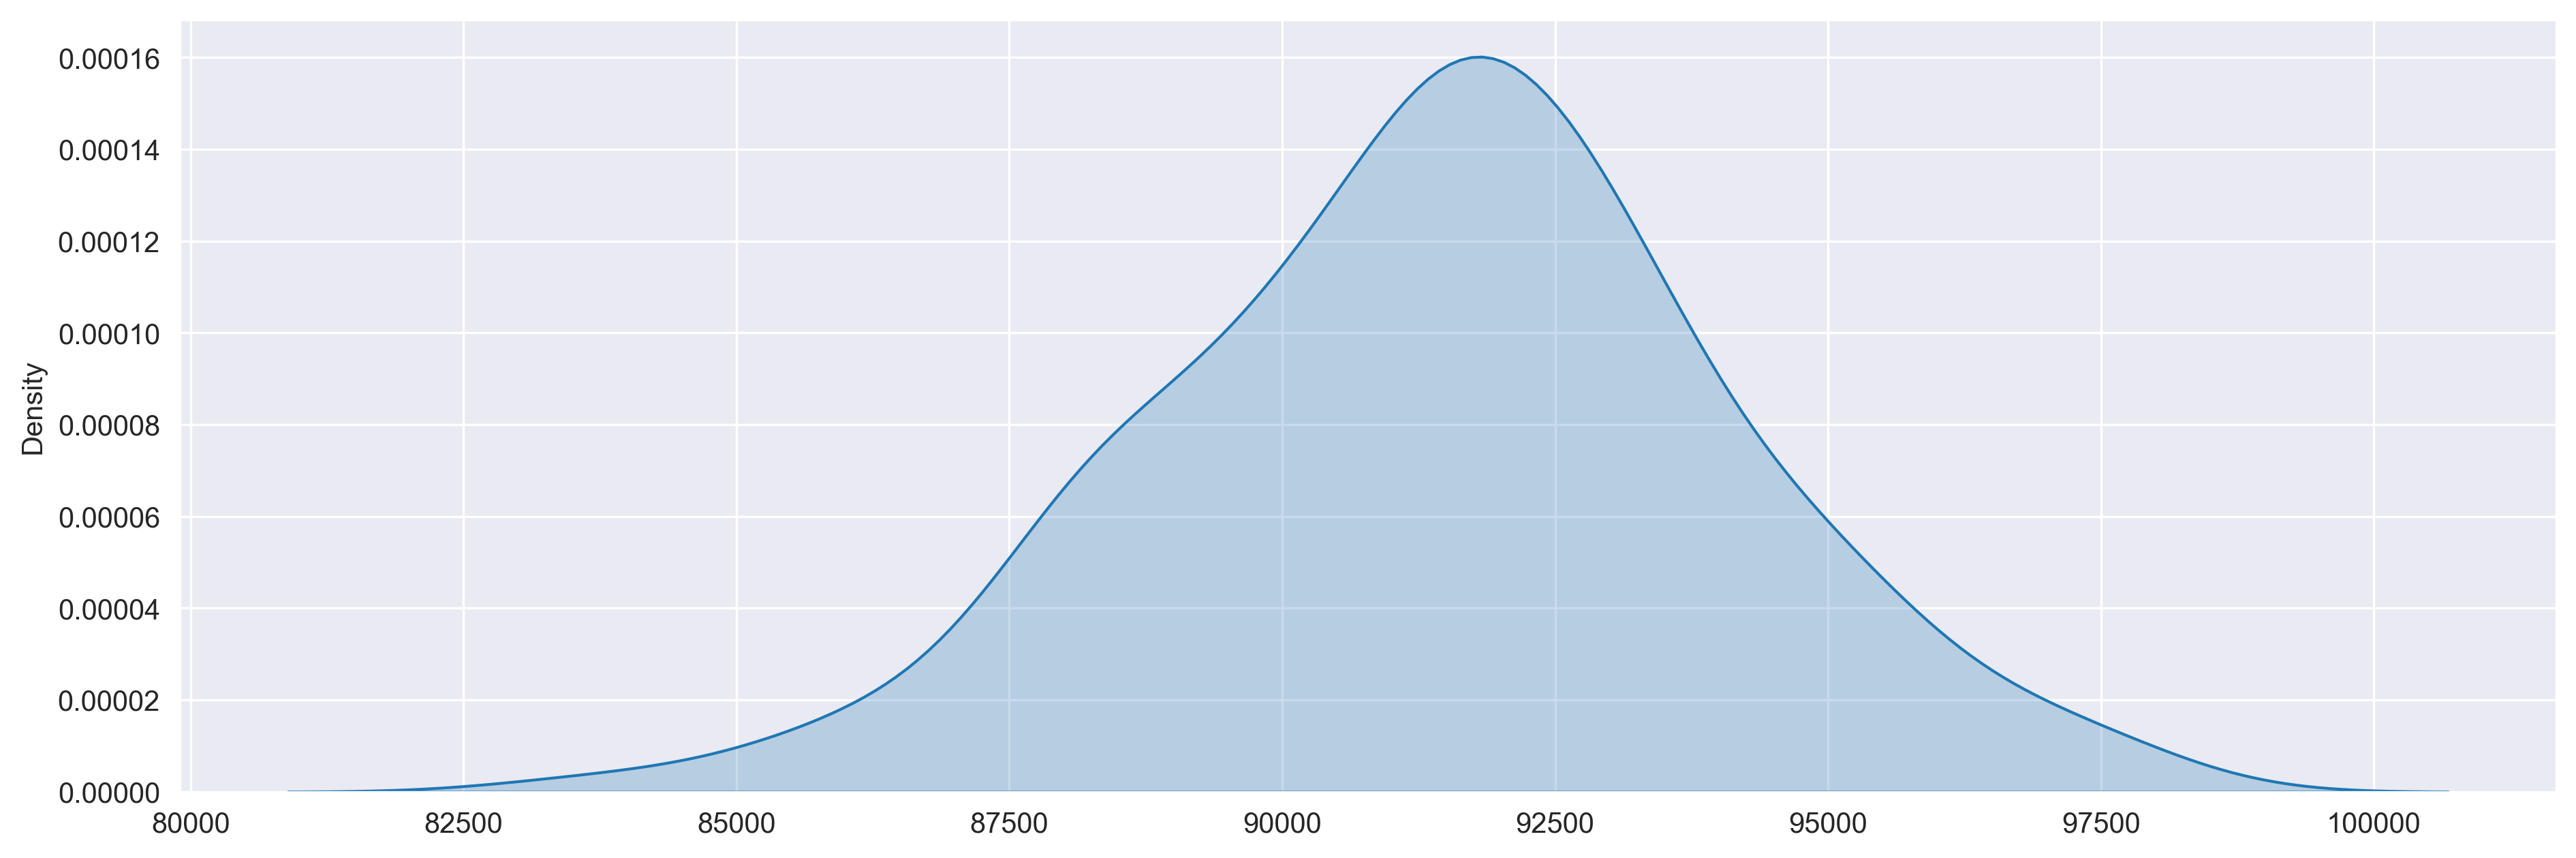

In [5]:
sample_means = return_mean_of_samples(200,100)
sns.kdeplot(sample_means,shade=True)
print("Total Samples: ",200)
print("Total elements in each sample: ",100)


- Here we create various sampling distributions by varying values of total samples and elements in each samples.



In [6]:
total_samples_list = [100,500]
elements_in_each_sample_list = [50,100,500]
mean_list = []
std_list = []
key_list = []
estimate_std_list = []
key=''
pop_mean = [population_mean]*6
pop_std = [population_std]*6
for tot in total_samples_list:
    for ele in elements_in_each_sample_list:
        key = '{}_samples_with_{}_elements_each'.format(tot,ele)
        key_list.append(key)
        mean_list.append(np.round(np.mean(return_mean_of_samples(tot,ele)),3))
        std_list.append(np.round(np.array(return_mean_of_samples(tot,ele)).std(),3))
        estimate_std_list.append(np.round(population_std/(np.sqrt(ele)),3))

In [7]:
# We summarize the results of the sampling distributons obtained
temp = pd.DataFrame(zip(key_list,pop_mean,mean_list,pop_std,estimate_std_list,std_list),columns=['Sample_Description','Population_Mean','Sample_Mean','Population_Standard_Deviation',"Pop_Std_Dev/"+u"\u221A"+"sample_size",'Sample_Standard_Deviation'])
temp

,Sample_Description,Population_Mean,Sample_Mean,Population_Standard_Deviation,Pop_Std_Dev/√sample_size,Sample_Standard_Deviation
0,100_samples_with_50_elements_each,91252.798,91723.971,24989.501,3534.049,3314.187
1,100_samples_with_100_elements_each,91252.798,91769.815,24989.501,2498.950,2582.939
2,100_samples_with_500_elements_each,91252.798,91349.728,24989.501,1117.564,1014.714
3,500_samples_with_50_elements_each,91252.798,91620.543,24989.501,3534.049,3661.310
4,500_samples_with_100_elements_each,91252.798,91090.309,24989.501,2498.950,2524.925
5,500_samples_with_500_elements_each,91252.798,91322.073,24989.501,1117.564,1112.721


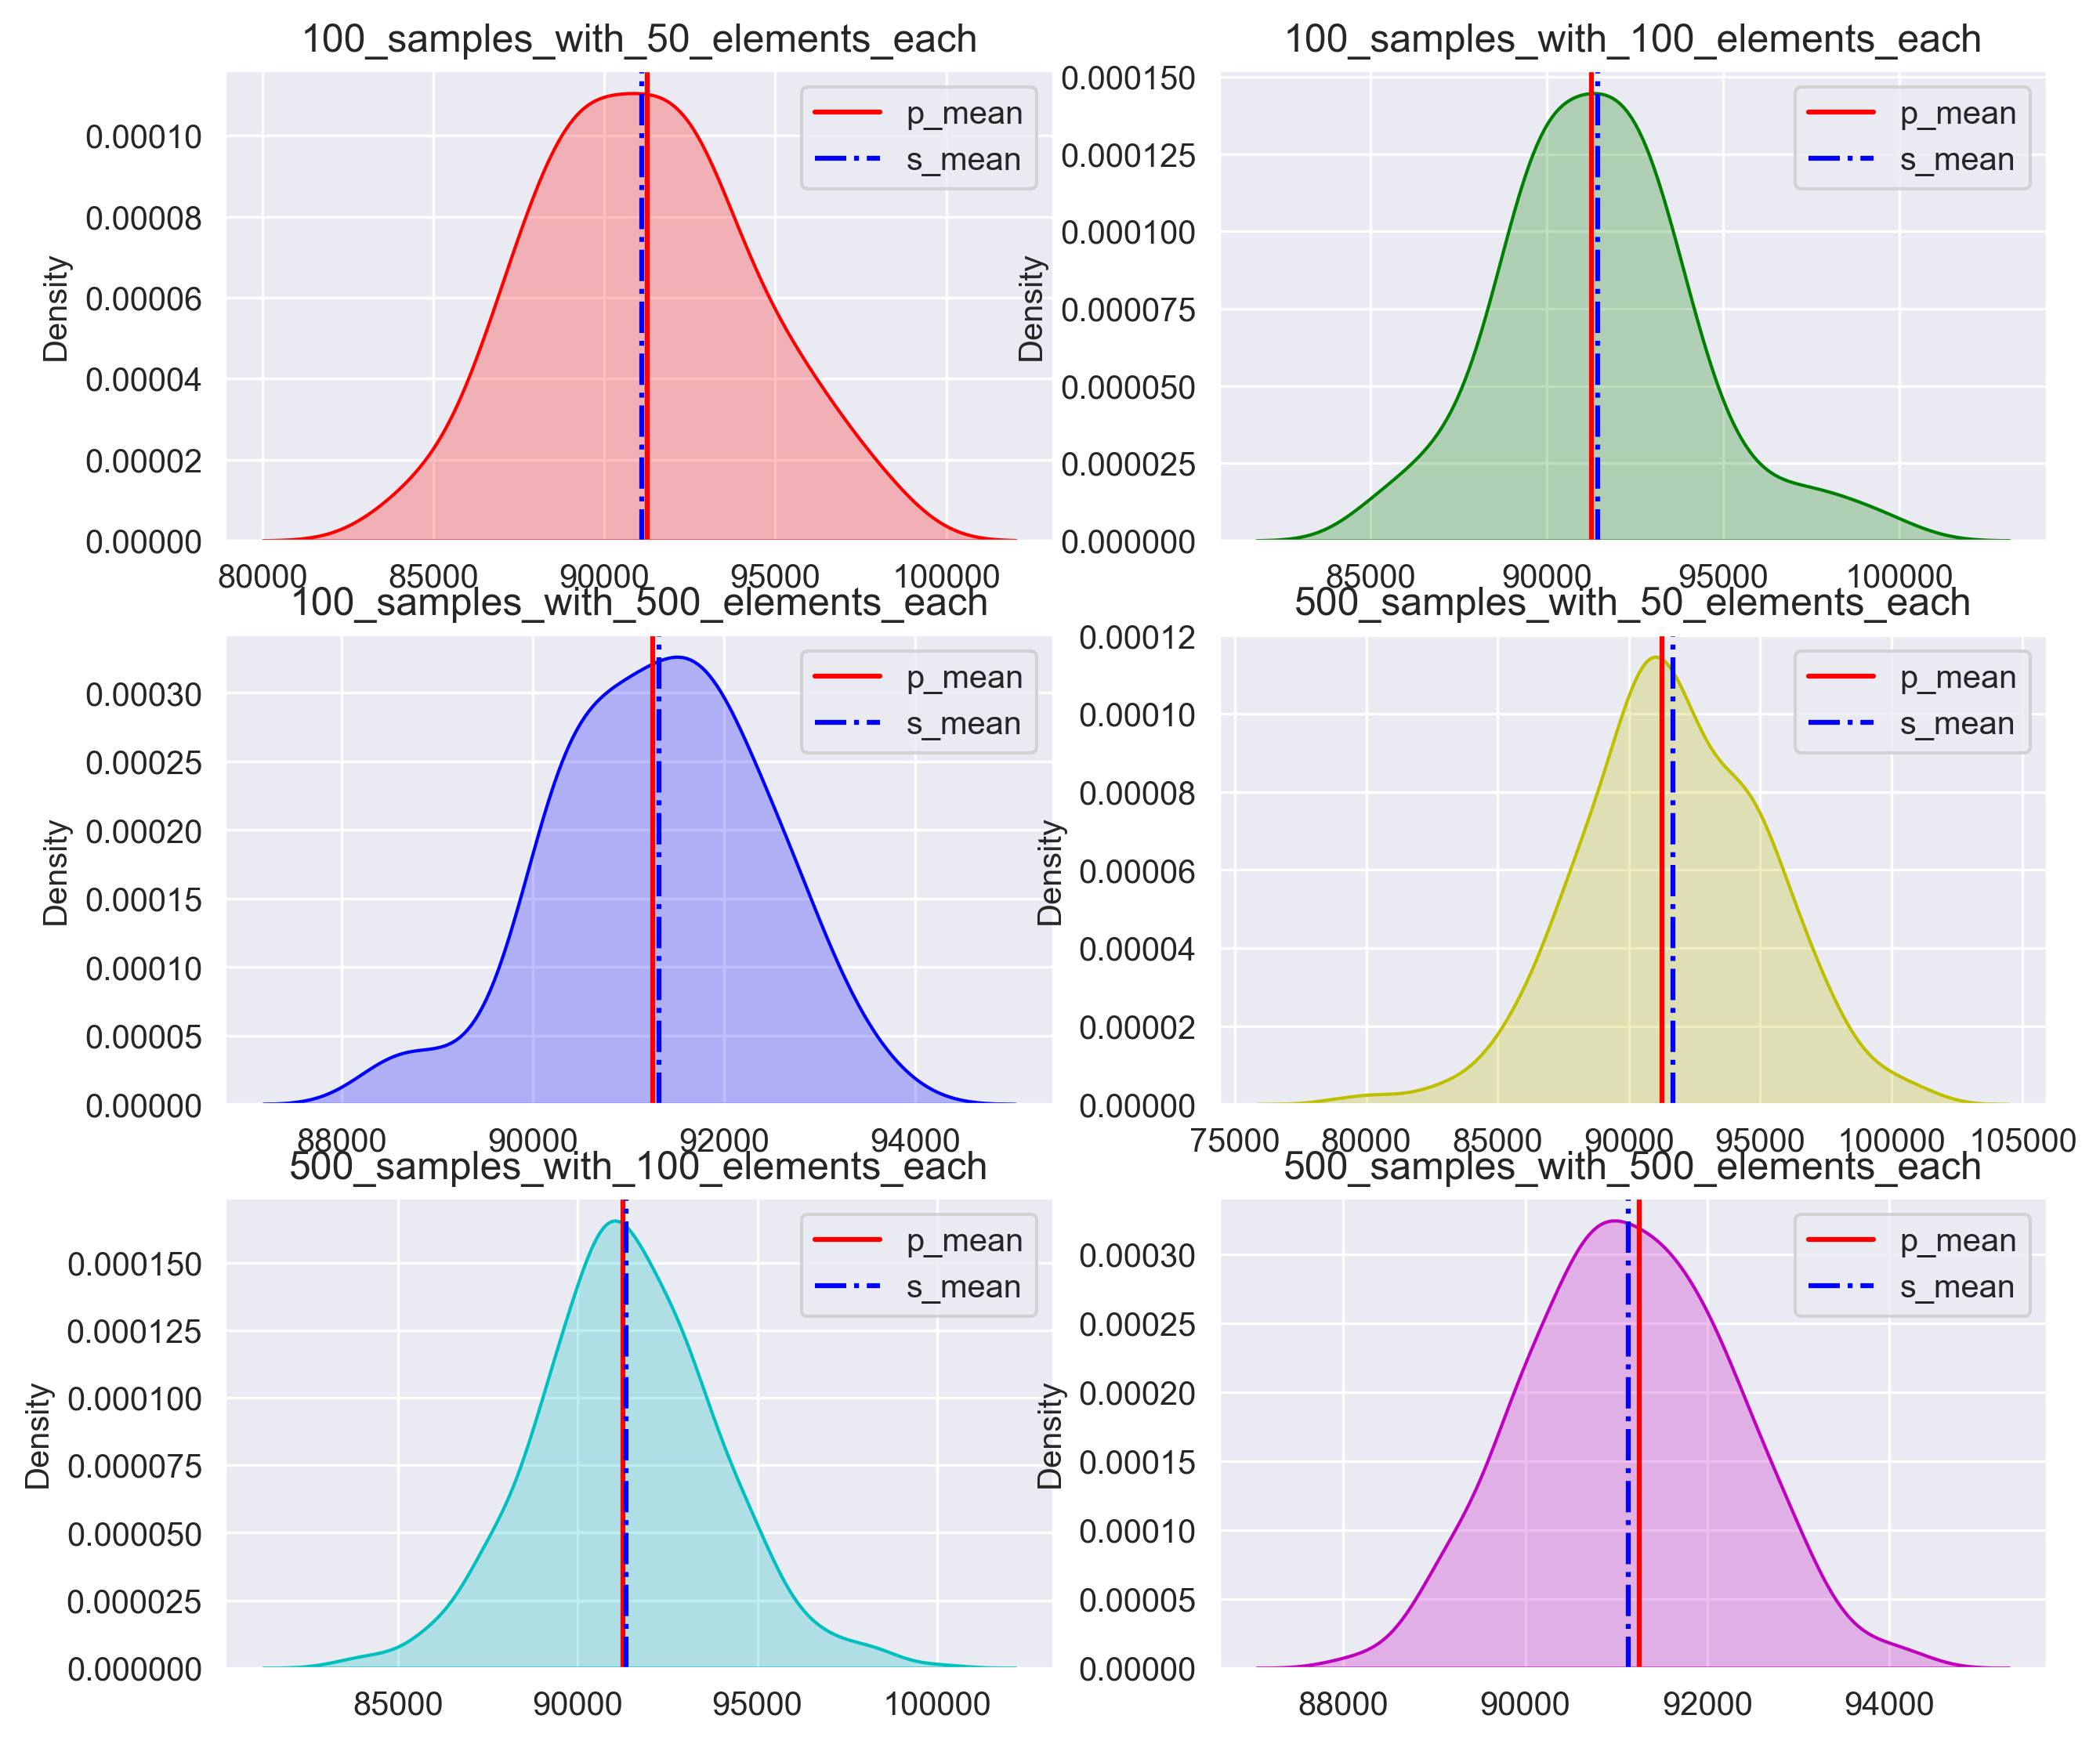

In [8]:
def plot_distribution(sample,population_mean,i,j,color,sampling_dist_type):
    '''This function takes the sampling distribution and population mean as input and plots them together'''
    sns.kdeplot(np.array(sample),color = color,ax = axs[i,j],shade=True)
    axs[i, j].axvline(population_mean, linestyle="-", color='r', label="p_mean")
    axs[i, j].axvline(np.array(sample).mean(), linestyle="-.", color='b', label="s_mean")
    axs[i, j].set_title(key)
    axs[i, j].legend()

colors = ['r','g','b','y', 'c', 'm', 'k']
plt_grid  = [(0,0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1)]
sample_sizes = [(100,50), (100, 100), (100, 500), (500, 50), (500, 100), (500, 500)]

total_samples_list = [100,500]
elements_in_each_sample_list = [50,100,500]

fig, axs = plt.subplots(3, 2,  figsize=(10, 9))
i = 0
for tot in total_samples_list:
    for ele in elements_in_each_sample_list:
        key = '{}_samples_with_{}_elements_each'.format(tot,ele)
        plot_distribution(return_mean_of_samples(tot,ele), population_mean , plt_grid[i][0], plt_grid[i][1] , colors[i], key)
        i = i + 1
plt.show()


-  Here we check if confidence intervals contains the actual population mean



In [9]:
sample_size = 50
standard_error = np.round(population_std/np.sqrt(sample_size),3)
def get_CI_percent(size):
    counter = 0
    lower_lim_ls = []
    upper_lim_ls = []
    sample_mean_ls = []
    pop_mean = [population_mean]*size
    status_ls = []
    for i in range(size):
        is_contains = False
        sample_mean = df.sample(50)['Income'].mean()
        sample_mean_ls.append(sample_mean)
        lower_lim = sample_mean - 2*standard_error
        lower_lim_ls.append(lower_lim)
        upper_lim = sample_mean + 2*standard_error
        upper_lim_ls.append(upper_lim)
        if (population_mean>=lower_lim)&(population_mean<=upper_lim):
            is_contains = True
            counter = counter + 1    
        status_ls.append(is_contains)
    print("{} % confidence Intervals contain the population mean".format(np.round(counter/size*100,2) ))
    return np.round(pd.DataFrame(zip(pop_mean,sample_mean_ls,lower_lim_ls,upper_lim_ls,status_ls),columns=['Population_Mean','Sample_Mean','Lower_Limit','Upper_Limit','Is_Present']),1)

In [10]:
get_CI_percent(20)

95.0 % confidence Intervals contain the population mean


,Population_Mean,Sample_Mean,Lower_Limit,Upper_Limit,Is_Present
0,91252.8,97557.9,90489.8,104626.0,True
1,91252.8,88006.8,80938.7,95074.9,True
2,91252.8,90819.2,83751.1,97887.3,True
3,91252.8,92116.6,85048.5,99184.7,True
4,91252.8,89130.9,82062.8,96199.0,True
5,91252.8,83660.1,76592.0,90728.2,False
6,91252.8,92694.7,85626.6,99762.8,True
7,91252.8,91929.8,84861.7,98997.9,True
8,91252.8,88560.8,81492.7,95628.9,True
9,91252.8,93934.9,86866.8,101003.0,True


# References


- https://en.wikipedia.org/wiki/Central_limit_theorem
- https://github.com/ravi207/central-limit-theorem

